In [4]:
# chapter4 question 1
mpg <- read.table("datasets/auto-mpg.txt")

In [8]:
#(a)fit a regression tree to a training subset of data
library(tree)
training <- sample(nrow(mpg), nrow(mpg)/2)
model <- tree(mpg~.,data=mpg[training,-8])


node), split, n, deviance, yval
      * denotes terminal node

 1) root 196 12900.00 23.26  
   2) weight < 3042.5 114  4185.00 28.60  
     4) horsepower < 78.5 52  1335.00 32.90  
       8) model < 77.5 20   224.50 28.85 *
       9) model > 77.5 32   576.50 35.44  
        18) displacement < 90.5 12   280.70 38.43 *
        19) displacement > 90.5 20   123.40 33.64 *
     5) horsepower > 78.5 62  1080.00 24.99  
      10) model < 78.5 39   374.20 23.36  
        20) weight < 2764.5 28   186.50 24.60 *
        21) weight > 2764.5 11    35.61 20.21 *
      11) model > 78.5 23   425.10 27.76 *
   3) weight > 3042.5 82   932.40 15.83  
     6) displacement < 284.5 26   281.10 19.12 *
     7) displacement > 284.5 56   239.30 14.30 *


Regression tree:
tree(formula = mpg ~ ., data = mpg[training, -8])
Variables actually used in tree construction:
[1] "weight"       "horsepower"   "model"        "displacement"
Number of terminal nodes:  8 
Residual mean deviance:  9.555 = 1796 / 188 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-7.9610 -1.7400 -0.2982  0.0000  1.7020 10.8800 

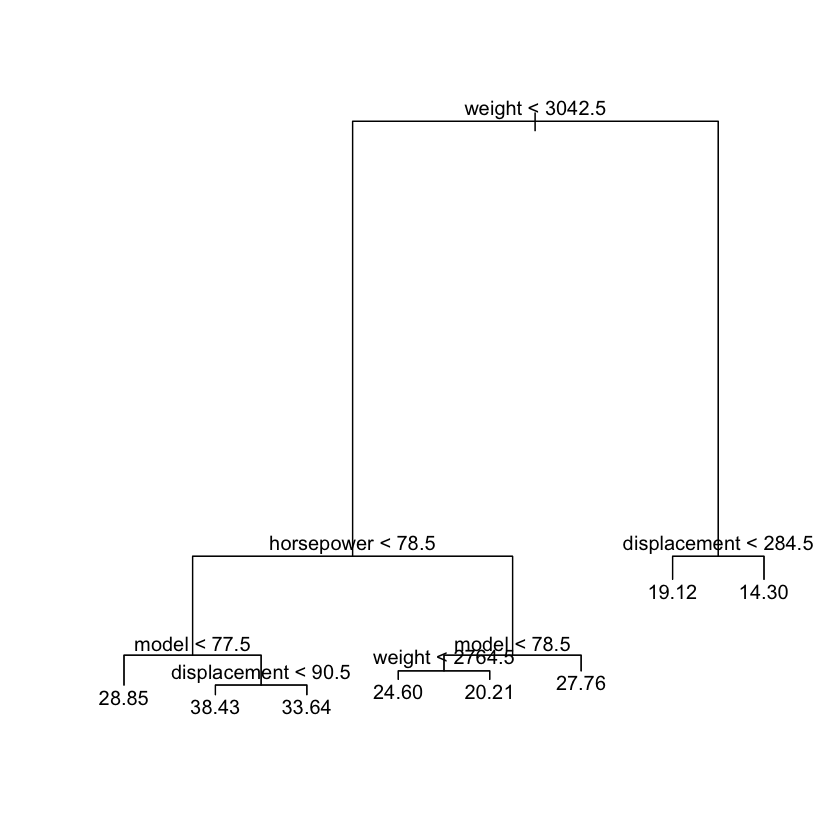

In [9]:
#(b) plot out the resulting model, and explain in a few short
#sentences what the output shows
plot(model)
text(model)
model
summary(model)



	Pearson's product-moment correlation

data:  predict(model, mpg[-training, ]) and mpg$mpg[-training]
t = 25.095, df = 194, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8367395 0.9037586
sample estimates:
      cor 
0.8743554 


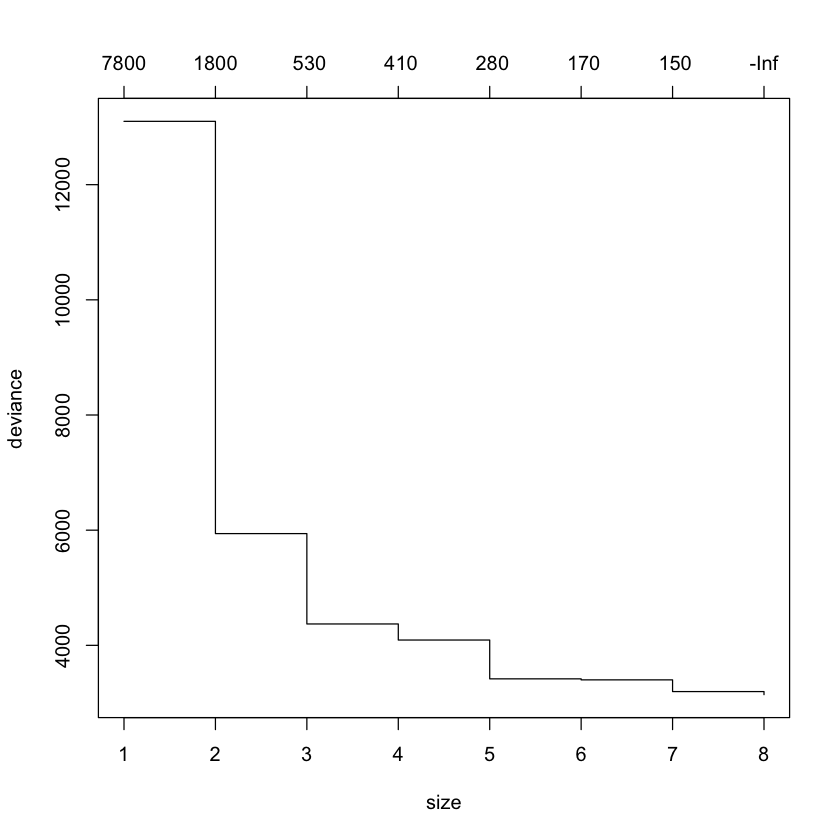

In [10]:
#(c)validate your regression tree using independent data
cor.test(predict(model, mpg[-training,]), mpg$mpg[-training])
plot(cv.tree(model))

1            2            4            5            6 
-0.329859089  0.007678430 -0.006794618  0.085273247  0.753367180

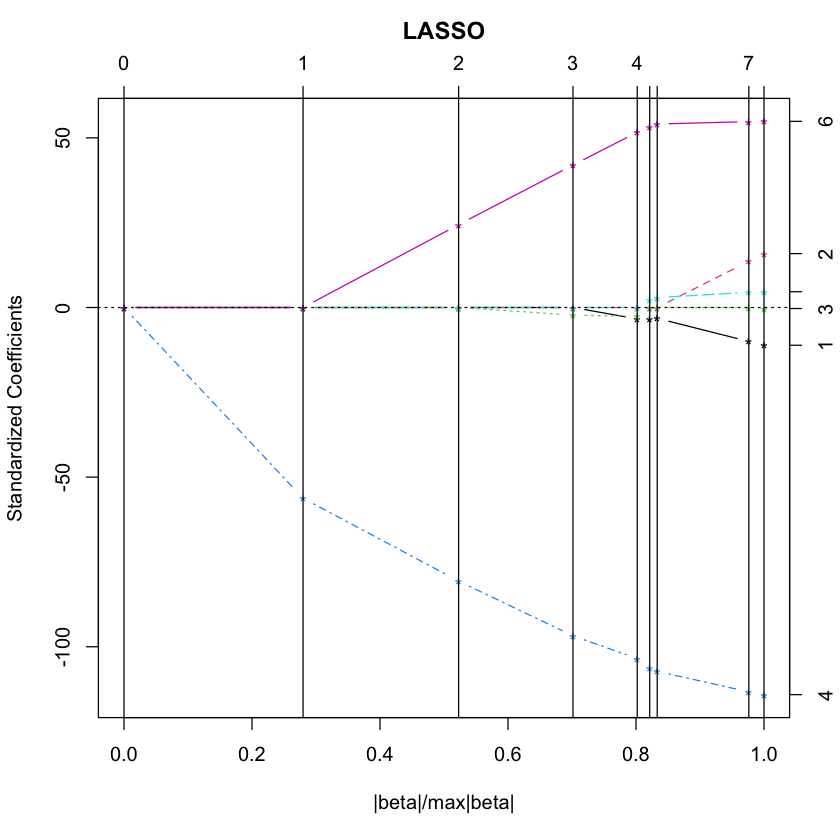

In [15]:
#(d)fit a lasso regression to these data. plot out your model 
#and explain, in a few sentences, what the fitting process is 
#showing you as it progresses
library(lars)
response <- as.vector(mpg[,1])
explanatory <- mpg[,-1]
explanatory <- explanatory[,-7]
explanatory <- as.matrix(explanatory)

lasso.model <- lars(explanatory, response, type='lasso')
plot(lasso.model)

signif.coefs <- function(model, threshold=0.001){
    coefs <- coef(model)
    signif <- which(abs(coefs[nrow(coefs),]) > threshold)
    return(setNames(coefs[nrow(coefs),signif], signif))
}
signif.coefs(lasso.model)

1            2            4            5            6 
-0.329859089  0.007678430 -0.006794618  0.085273247  0.753367180

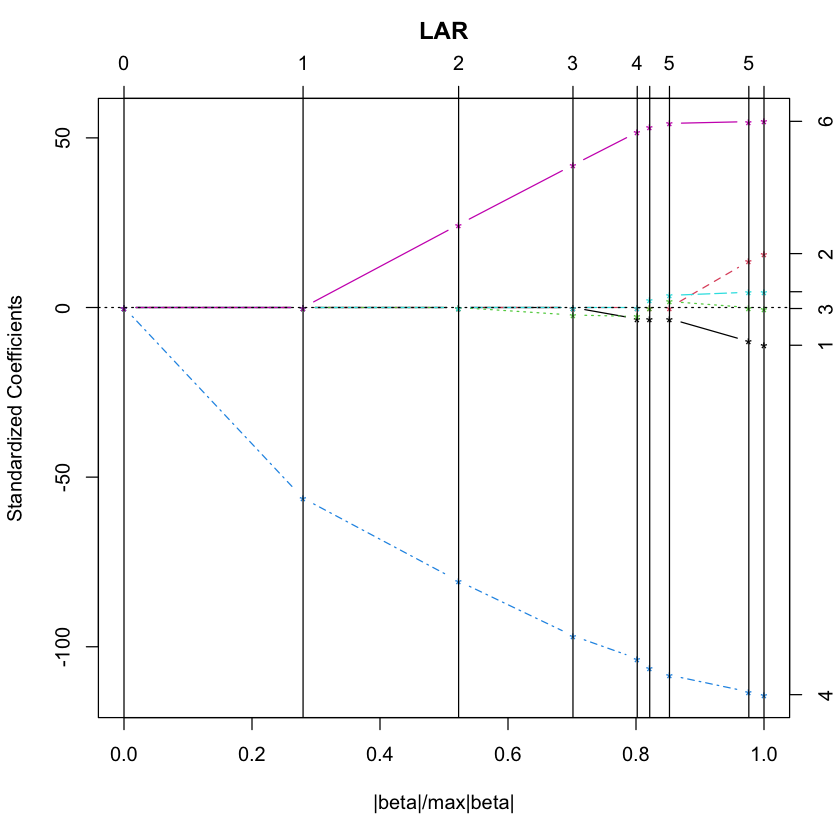

In [16]:
#(e)now fit a lar to these data. compare your results with those 
#of parts (a), (c), and (d) above. Which model do you find the 
#easiest to interpret? Why?
lar.model <- lars(explanatory, response, type='lar')
plot(lar.model)
signif.coefs(lar.model)


In [17]:
#question 2
fire <- read.csv("datasets/forestfires.csv")

In [ ]:
#(a)fit a regression tree to this data. explain what it means intuitively
training <- sample(nrow(fire), nrow(fire)/2)
model <- tree(mpg~.,data=fire[training,-8])
plot(model)
text(model)
model
summary(model)

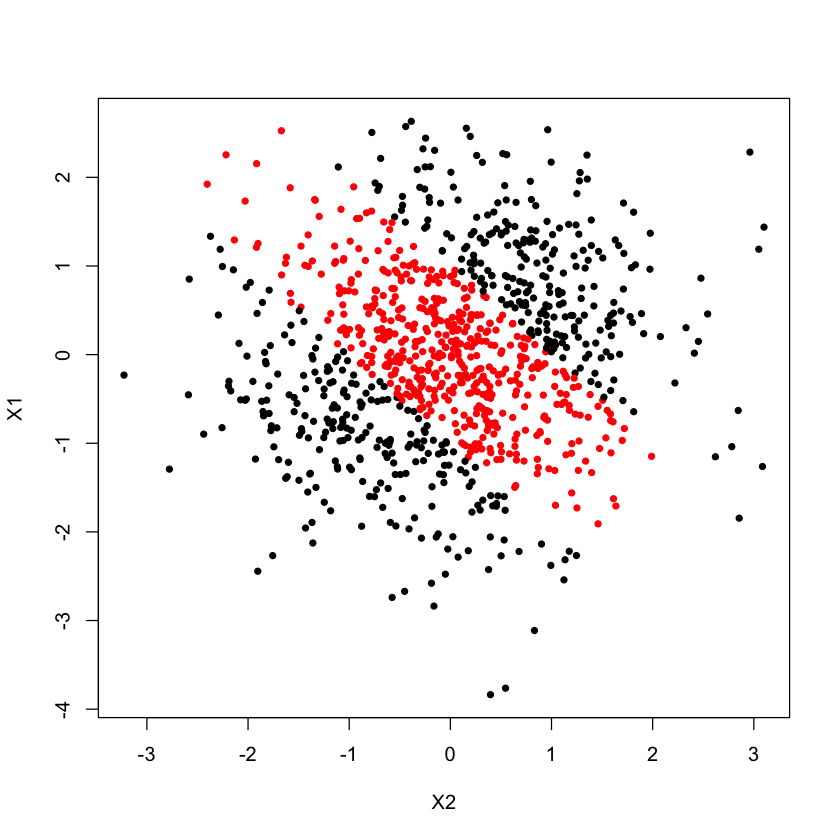

       
        FALSE TRUE
  FALSE   236    3
  TRUE      7  254


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
     1   10

- best performance: 0.012 


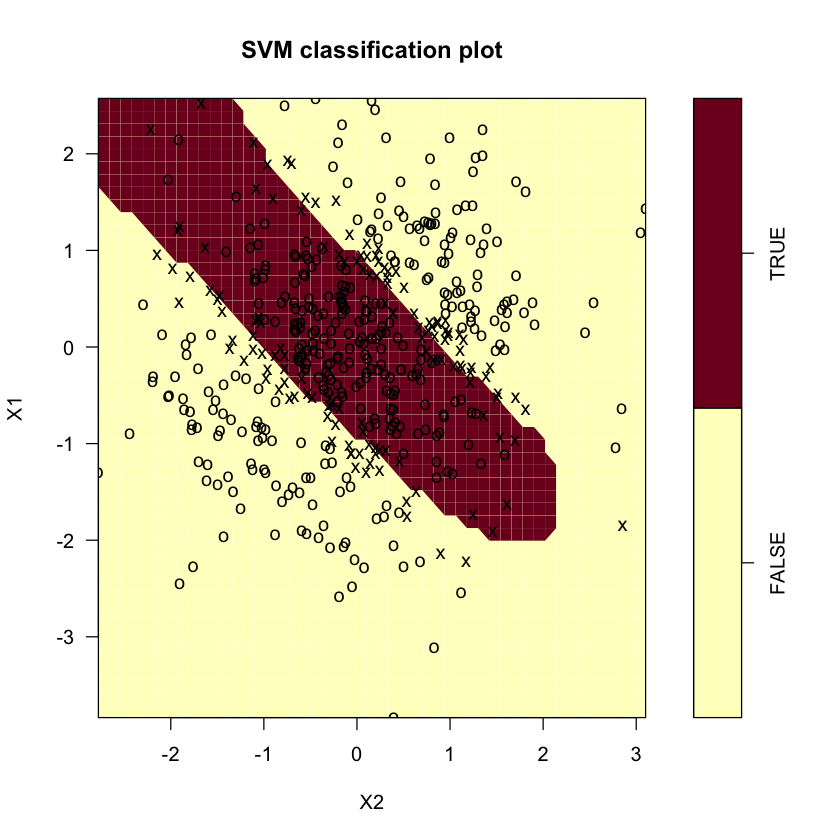

In [2]:
data <- data.frame(replicate(2, rnorm(1000)))
data$y = (rowSums(data) > (median(rowSums(data)) - 1)) &
    (rowSums(data) < (median(rowSums(data)) + 1))
with(data, plot(X1~X2, pch=20, col=ifelse(y, "red", "black")))


library(e1071)
training <- sample(nrow(data), nrow(data)/2)
model <- svm(y~., data=data[training,], type="C")
plot(model, data[training,])

table(predict(model, data[-training,]), data$y[-training])

tune.svm(factor(y)~., data=data[-training,], gamma=c(.5,1,10), cost=c(1,10))


In [5]:


explanatory <- data.frame(replicate(10, rnorm(400)))
names(explanatory) <- letters[1:10]
response <- with(explanatory, a*2 -0.5*b - i*j + exp(abs(c)))
data <- data.frame(scale(cbind(explanatory,response)))

training <- sample(nrow(data), nrow(data)/2)
model <- neuralnet(response~a+b+c+d+e+f+g+h+i+j,
                   dat=data[training,], hidden=5)
cor.test(compute(model, data[-training,1:10])$net.result[,1],
         data$response[-training])
plot(model)




	Pearson's product-moment correlation

data:  compute(model, data[-training, 1:10])$net.result[, 1] and data$response[-training]
t = 34.868, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9050345 0.9445503
sample estimates:
      cor 
0.9273344 


,rel_imp
,<dbl>
a,0.08755014
b,0.06781594
c,0.29326934
d,0.07683670
e,0.07471691
f,0.09115492
g,0.05174383
h,0.06183186
i,0.11351634


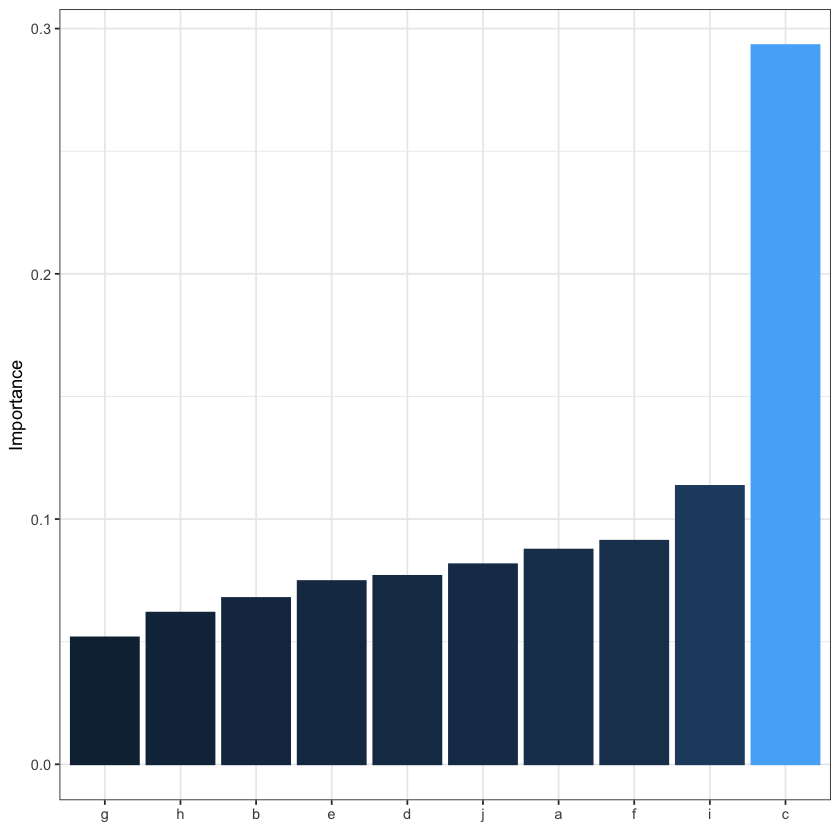

In [6]:
library(NeuralNetTools)
garson(model, bar_plot=FALSE)
garson(model)